This work studies the features of words in a Russian novel named «Живи и помни»．
Firstly, we should read the file to get the text of the novel.

In [104]:
import re

In [105]:
from pymystem3 import Mystem
import pymorphy2

In [106]:
m = Mystem()

In [107]:
f= open(r'zhivi-i-pomni-5.txt','r',encoding='utf-8')

In [108]:
content=''.join(f.readlines())

In [109]:
print(content)

Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков. Трагизм и горькая правда его произведений поразили читателей недаром его повести и рассказы экранизированы и поставлены на многих театральных сценах. Произведения Валентина Распутина глубоко психологичны, автор исследует вечные темы добра, справедливости, долга, в каждом поступке его героев раскрывается их человеческая сущность. Зима на сорок пятый, последний военный год в этих краях, простояла сиротской, но крещенские морозы свое взяли, отстучали, как им полагается, за сорок. Прокалившись за неделю, отстал с деревьев куржак, и лес совсем помертвел, снег по земле заскрип и покрошился, в жестком и ломком воздухе по утрам было трудно продохнуть. Потом снова отпустило, после этого отпустило еще раз, и на открытых местах рано затвердел наст. В морозы в бане Гуськовых, стоящей на нижнем огороде у Ангары, поближе к воде, случилась пропажа: исчез хороший, старой работы, плотницкий топ

We can creat word clouds from the text. 

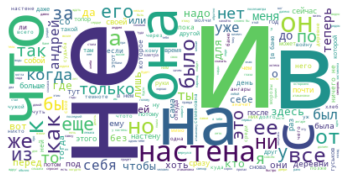

In [222]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", max_words=2000)

# generating
cloud.generate(content)

# displaying
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
cloud.to_file("post_cloud.png")

We can see the most often words are "и", "не", "в", "на", "что".
Then we can do the syntactic parsing to the aentence in the novel. I picked the first sentence.

In [49]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [50]:
d = nlp("Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков.")
for token in d:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Имя amod Григорьевича PROPN []
Валентина compound Григорьевича PROPN []
Григорьевича compound Распутина PROPN [Имя, Валентина]
Распутина compound известно VERB [Григорьевича]
известно ccomp переведены NOUN [Распутина, миру]
всему compound миру NOUN []
миру dobj известно VERB [всему]
, punct переведены NOUN []
его compound книги NOUN []
книги nsubj переведены NOUN [его]
переведены ROOT переведены NOUN [известно, ,, книги, языков, .]
на nmod языков PROPN []
десятки compound языков PROPN []
иностранных compound языков PROPN []
языков dobj переведены NOUN [на, десятки, иностранных]
. punct переведены NOUN []


In [51]:
from spacy import displacy

In [202]:
d = nlp("Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков.")

displacy.render(d, style='dep')

Then we can remove the punctuations and lower the words and analyze them.

In [110]:
import re, string

In [111]:
for c in string.punctuation:
    content = content.replace(c, "").replace("\xa0",' ')
content

'Имя Валентина Григорьевича Распутина известно всему миру его книги переведены на десятки иностранных языков Трагизм и горькая правда его произведений поразили читателей недаром его повести и рассказы экранизированы и поставлены на многих театральных сценах Произведения Валентина Распутина глубоко психологичны автор исследует вечные темы добра справедливости долга в каждом поступке его героев раскрывается их человеческая сущность Зима на сорок пятый последний военный год в этих краях простояла сиротской но крещенские морозы свое взяли отстучали как им полагается за сорок Прокалившись за неделю отстал с деревьев куржак и лес совсем помертвел снег по земле заскрип и покрошился в жестком и ломком воздухе по утрам было трудно продохнуть Потом снова отпустило после этого отпустило еще раз и на открытых местах рано затвердел наст В морозы в бане Гуськовых стоящей на нижнем огороде у Ангары поближе к воде случилась пропажа исчез хороший старой работы плотницкий топор Михеича Сроду когда надо 

In [112]:
content = content.lower()
content

'имя валентина григорьевича распутина известно всему миру его книги переведены на десятки иностранных языков трагизм и горькая правда его произведений поразили читателей недаром его повести и рассказы экранизированы и поставлены на многих театральных сценах произведения валентина распутина глубоко психологичны автор исследует вечные темы добра справедливости долга в каждом поступке его героев раскрывается их человеческая сущность зима на сорок пятый последний военный год в этих краях простояла сиротской но крещенские морозы свое взяли отстучали как им полагается за сорок прокалившись за неделю отстал с деревьев куржак и лес совсем помертвел снег по земле заскрип и покрошился в жестком и ломком воздухе по утрам было трудно продохнуть потом снова отпустило после этого отпустило еще раз и на открытых местах рано затвердел наст в морозы в бане гуськовых стоящей на нижнем огороде у ангары поближе к воде случилась пропажа исчез хороший старой работы плотницкий топор михеича сроду когда надо 

In [113]:
ana = m.analyze(content)
print(ana[:10])

[{'analysis': [{'lex': 'имя', 'wt': 1, 'gr': 'S,сред,неод=(вин,ед|им,ед)'}], 'text': 'имя'}, {'text': ' '}, {'analysis': [{'lex': 'валентин', 'wt': 0.1003944287, 'gr': 'S,имя,муж,од=(вин,ед|род,ед)'}], 'text': 'валентина'}, {'text': ' '}, {'analysis': [{'lex': 'григорьевич', 'wt': 1, 'gr': 'S,отч,муж,од=(вин,ед|род,ед)'}], 'text': 'григорьевича'}, {'text': ' '}, {'analysis': [{'lex': 'распутин', 'wt': 0.9382723699, 'gr': 'S,фам,муж,од=(вин,ед|род,ед)'}], 'text': 'распутина'}, {'text': ' '}, {'analysis': [{'lex': 'известно', 'wt': 0.03600856486, 'gr': 'ADV,вводн='}], 'text': 'известно'}, {'text': ' '}]


We can extract the values we need fron the result of analysis.

In [114]:
dic={}
for word in ana:
    if 'analysis' in word:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        lex = word['analysis'][0]['lex']
        wt = word['analysis'][0]['wt']
               cont = word['text']
        if cont in dic:
            dic[cont][4]+=1
        else:
            dic[cont] = ([cont, lex,wt,pos,1])
            
list_content = []
        
for  i in dic:
    list_content.append(dic[i])
list_content = sorted(list_content, key=lambda x:x[4], reverse=True)
for i in list_content:
    print(i)

['и', 'и', 0.9999770357, 'CONJ', 239]
['не', 'не', 1, 'PART', 159]
['в', 'в', 0.9999917878, 'PR', 127]
['на', 'на', 0.9989522965, 'PR', 107]
['что', 'что', 0.688532576, 'CONJ', 92]
['с', 'с', 0.999977831, 'PR', 72]
['она', 'она', 1, 'SPRO', 65]
['настена', 'настена', 1, 'S', 60]
['он', 'он', 1, 'SPRO', 57]
['к', 'к', 0.9999551798, 'PR', 44]
['но', 'но', 0.9998906299, 'CONJ', 39]
['а', 'а', 0.9822148501, 'CONJ', 38]
['как', 'как', 0.6102574114, 'CONJ', 35]
['ее', 'она', 0.9999876545, 'SPRO', 31]
['от', 'от', 1, 'PR', 30]
['же', 'же', 0.9351936974, 'PART', 30]
['все', 'все', 0.1955883233, 'SPRO', 30]
['было', 'быть', 0.975680698, 'V', 29]
['бы', 'бы', 1, 'PART', 26]
['у', 'у', 0.9993940324, 'PR', 25]
['ни', 'ни', 0.5596380099, 'PART', 25]
['его', 'его', 3.284086391e-05, 'APRO', 23]
['еще', 'еще', 0.9209452641, 'ADV', 23]
['из', 'из', 0.9999999775, 'PR', 23]
['за', 'за', 1, 'PR', 21]
['я', 'я', 0.9999716281, 'SPRO', 21]
['по', 'по', 1, 'PR', 20]
['так', 'так', 0.9840554802, 'ADVPRO', 20]


I coppied the values into a csv file named 'zhivi_words.csv'.

In [116]:
import sqlite3
import csv
with open('zhivi_words.csv', 'r', encoding='utf-8') as f:
    f = f.readlines()
    
conn = sqlite3.connect('zhivi_words.db')
c = conn.cursor()

c.execute("DROP TABLE IF EXISTS count_text")
c.execute("CREATE TABLE IF NOT EXISTS count_text(content,count)")

c.execute("DROP TABLE IF EXISTS PoS_text")
c.execute("CREATE TABLE IF NOT EXISTS PoS_text(content,lex,PoS)")

c.execute("DROP TABLE IF EXISTS weight_text")
c.execute("CREATE TABLE IF NOT EXISTS weight_text(content,wt)")

for cont in dic:
    row = dic[cont]
    print(row)
    c.execute("INSERT INTO count_text VALUES (?,?)", (row[0],row[4]))
    c.execute("INSERT INTO PoS_text VALUES (?,?,?)", (row[0],row[1],row[3]))
    c.execute("INSERT INTO weight_text VALUES (?,?)", (row[0],row[2]))
    
conn.commit()
for i in c.execute("SELECT * FROM count_text"):
    print(i)
for i in c.execute("SELECT * FROM PoS_text"):
    print(i)
for i in c.execute("SELECT * FROM weight_text"):
    print(i)

conn.close()

['имя', 'имя', 1, 'S', 1]
['валентина', 'валентин', 0.1003944287, 'S', 2]
['григорьевича', 'григорьевич', 1, 'S', 1]
['распутина', 'распутин', 0.9382723699, 'S', 2]
['известно', 'известно', 0.03600856486, 'ADV', 1]
['всему', 'весь', 0.5154419261, 'APRO', 1]
['миру', 'мир', 0.9805195877, 'S', 1]
['его', 'его', 3.284086391e-05, 'APRO', 23]
['книги', 'книга', 1, 'S', 1]
['переведены', 'переводить', 0.1801296314, 'V', 1]
['на', 'на', 0.9989522965, 'PR', 107]
['десятки', 'десяток', 0.7864435919, 'S', 2]
['иностранных', 'иностранный', 1, 'A', 1]
['языков', 'язык', 0.9811160565, 'S', 1]
['трагизм', 'трагизм', 1, 'S', 1]
['и', 'и', 0.9999770357, 'CONJ', 239]
['горькая', 'горький', 0.9967350366, 'A', 1]
['правда', 'правда', 0.8374588342, 'ADV', 4]
['произведений', 'произведение', 1, 'S', 1]
['поразили', 'поражать', 1, 'V', 1]
['читателей', 'читатель', 1, 'S', 1]
['недаром', 'недаром', 1, 'ADV', 1]
['повести', 'повесть', 0.9983443175, 'S', 1]
['рассказы', 'рассказ', 1, 'S', 1]
['экранизированы',

['набору', 'набор', 1, 'S', 1]
['числе', 'число', 1, 'S', 1]
['которых', 'который', 1, 'APRO', 2]
['уезжали', 'уезжать', 1, 'V', 1]
['пяти', 'пять', 1, 'NUM', 1]
['ходках', 'ходок', 0.7688089907, 'S', 1]
['провожающих', 'провожать', 1, 'V', 1]
['набралось', 'набираться', 1, 'V', 1]
['столько', 'столько', 0.9933862884, 'NUM', 2]
['фронтовиков', 'фронтовик', 1, 'S', 1]
['простился', 'прощаться', 1, 'V', 1]
['своими', 'свой', 0.9999595469, 'APRO', 1]
['растягивать', 'растягивать', 1, 'V', 1]
['причитания', 'причитание', 1, 'S', 1]
['травить', 'травить', 1, 'V', 1]
['попусту', 'попусту', 1, 'ADV', 1]
['душу', 'душа', 0.9942896889, 'S', 2]
['приходится', 'приходиться', 1, 'V', 1]
['обрывать', 'обрывать', 1, 'V', 2]
['надеялся', 'надеяться', 1, 'V', 1]
['когданибудь', 'когданибудь', 1, 'ADV', 1]
['недалеко', 'недалеко', 0.9989129764, 'ADV', 1]
['закончить', 'заканчивать', 1, 'V', 1]
['хватаясь', 'хвататься', 1, 'V', 1]
['держат', 'держать', 1, 'V', 1]
['обнялся', 'обниматься', 1, 'V', 1]
['м

('неприличным', 'неприличный', 'A')
('заменили', 'заменять', 'V')
('атамановкой', 'атамановка', 'S')
('смысл', 'смысл', 'S')
('вроде', 'вроде', 'PART')
('остается', 'оставаться', 'V')
('уши', 'ухо', 'S')
('коробит', 'коробить', 'V')
('местный', 'местный', 'A')
('народ', 'народ', 'S')
('кстати', 'кстати', 'ADV')
('этим', 'этот', 'APRO')
('переименованием', 'переименование', 'S')
('почемуто', 'почемуто', 'ADV')
('согласился', 'соглашаться', 'V')
('спустя', 'спустя', 'PR')
('много', 'много', 'ADV')
('старики', 'старик', 'S')
('других', 'другой', 'APRO')
('деревень', 'деревня', 'S')
('сговорившись', 'сговариваться', 'V')
('повторяли', 'повторять', 'V')
('одно', 'один', 'APRO')
('вся', 'весь', 'APRO')
('занималась', 'заниматься', 'V')
('разбоем', 'разбой', 'S')
('захотели', 'захотеть', 'V')
('какогото', 'какогото', 'S')
('атамана', 'атаман', 'S')
('свалить', 'сваливать', 'V')
('выйдет', 'выходить', 'V')
('настену', 'настена', 'S')
('занесла', 'занести', 'V')
('верхней', 'верхний', 'A')
('го

('приходится', 1)
('обрывать', 1)
('надеялся', 1)
('когданибудь', 1)
('недалеко', 0.9989129764)
('закончить', 1)
('хватаясь', 1)
('держат', 1)
('обнялся', 1)
('матерью', 1)
('ворот', 0.8795940735)
('прыгнул', 1)
('ходок', 0.6280231599)
('понужнул', 0.4632204719)
('коня', 1)
('отъезжая', 0.7718141484)
('выдержал', 1)
('оглянуться', 1)
('поскотиной', 1)
('скрылась', 1)
('виду', 0.9998624398)
('натянул', 1)
('вожжи', 1)
('остальных', 0.9920828334)
('ехать', 1)
('обозом', 1)
('карде', 1)
('пересели', 0.8900660991)
('пароход', 1)
('подгадывали', 1)
('спустились', 1)
('райцентр', 1)
('обратном', 1)
('пути', 1)
('повез', 0.8540009359)
('собранную', 0.450035926)
('района', 1)
('команду', 1)
('проплывали', 1)
('карауля', 1)
('спали', 0.9663626059)
('издали', 0.8810329411)
('принялись', 1)
('вразнобой', 1)
('кричать', 1)
('главное', 0.5870474306)
('кричат', 1)
('смотрел', 1)
('молча', 0.8918063407)
('готов', 0.9827333505)
('обвинить', 1)
('вынужден', 0.6798611843)
('покидать', 0.8743198942)
('до

Now I created a database with three tables which with the key "content". Then we can creat a dataframe from the database.

In [3]:
import sqlite3
import pandas as pd

#con = sqlite3.connect('zhivi_words.db')
#cursor = con.cursor()
with sqlite3.connect('zhivi_words.db') as con:
    c = con.cursor()
packs = pd.read_sql("""
SELECT count, count_text.content, lex, PoS, wt
FROM count_text
    JOIN PoS_text ON PoS_text.content = count_text.content
    JOIN weight_text ON weight_text.content = count_text.content""", con = con)
#sql ="SELECT * FROM packs"
#values = cursor.execute(sql)
#packs = pd.DataFrame(data = values)

print(packs.shape)
print(packs.dtypes)
print(packs.head())

(2351, 5)
count        int64
content     object
lex         object
PoS         object
wt         float64
dtype: object
   count       content          lex  PoS        wt
0      1           имя          имя    S  1.000000
1      2     валентина     валентин    S  0.100394
2      1  григорьевича  григорьевич    S  1.000000
3      2     распутина     распутин    S  0.938272
4      1      известно     известно  ADV  0.036009


In [138]:
packs.shape, packs.dropna().shape # the shape of the dataframe: rows, columns

((2351, 5), (2351, 5))

We can select some columns or filter out some rows with specific conditions.

In [136]:
df = packs[["content", "PoS", "wt"]]

In [137]:
df.head()

,content,PoS,wt
0,имя,S,1.000000
1,валентина,S,0.100394
2,григорьевича,S,1.000000
3,распутина,S,0.938272
4,известно,ADV,0.036009


In [203]:
packs[packs["count"] > 10]

,count,content,lex,PoS,wt
7,23,его,его,APRO,0.000033
10,107,на,на,PR,0.998952
15,239,и,и,CONJ,0.999977
39,127,в,в,PR,0.999992
57,39,но,но,CONJ,0.999891
63,35,как,как,CONJ,0.610257
66,21,за,за,PR,1.000000
70,72,с,с,PR,0.999978
77,20,по,по,PR,1.000000
85,29,было,быть,V,0.975681


As we can see, we found the values which the wourds show twice in the novel. 
We can also do some calculations.

In [144]:
packs["PoS"].value_counts()

V         889
S         711
A         274
ADV       208
APRO       89
SPRO       49
PR         39
PART       23
ADVPRO     20
CONJ       18
NUM        15
ANUM       14
INTJ        2
Name: PoS, dtype: int64

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

Text(0, 0.5, 'Number of words')

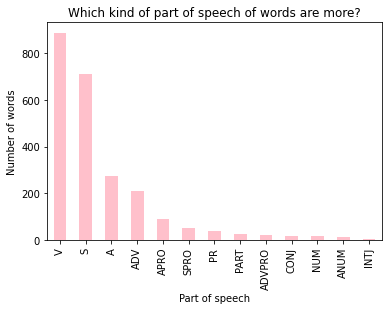

In [204]:
packs["PoS"].value_counts().plot.bar(color='pink');
plt.title('Which kind of part of speech of words are more?')
plt.xlabel('Part of speech')
plt.ylabel('Number of words')

From this plot, we can know the verbs, nouns, adjectives, and adverbs are more than other words in the novel.
We can also show them by using a pie plot, which can show the proportion.

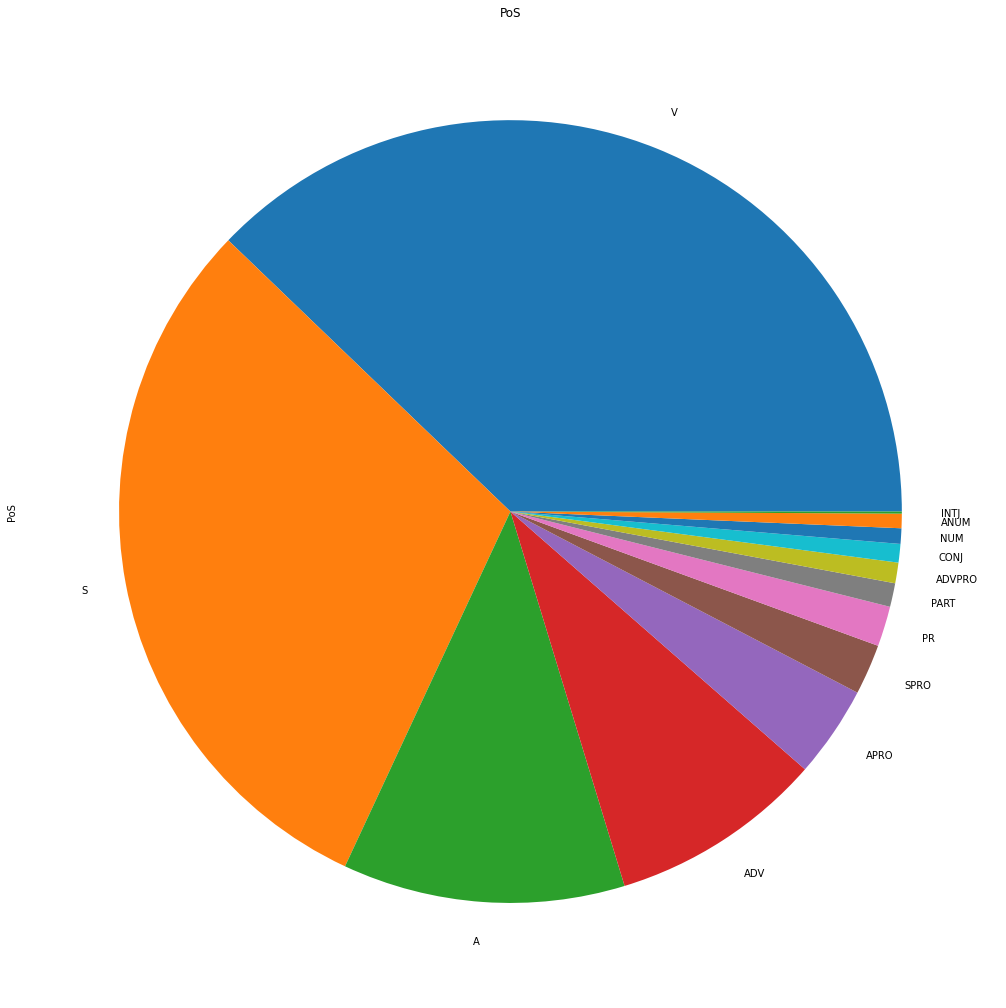

In [191]:
plt.figure(figsize=(18, 18))
packs['PoS'].value_counts().plot(kind='pie');
plt.title('PoS');

We can count the mean values of weight of each kind of part of speech and show them in a bar plot.

In [145]:
packs.groupby("PoS").agg({"wt": "mean"})

,wt
PoS,
A,0.941289
ADV,0.854497
ADVPRO,0.994578
ANUM,0.993304
APRO,0.913230
CONJ,0.821122
INTJ,0.999865
NUM,0.942110
PART,0.776820


Text(0, 0.5, 'Mean of weight')

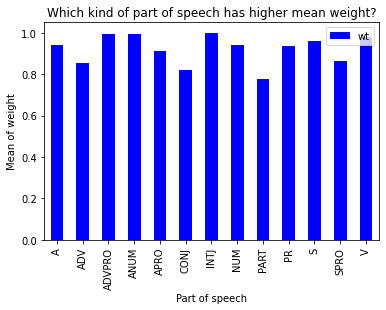

In [205]:
packs.groupby("PoS").agg({"wt": "mean"}).plot.bar(color='blue');
plt.title('Which kind of part of speech has higher mean weight?')
plt.xlabel('Part of speech')
plt.ylabel('Mean of weight')

We can also show them by using a box plot.

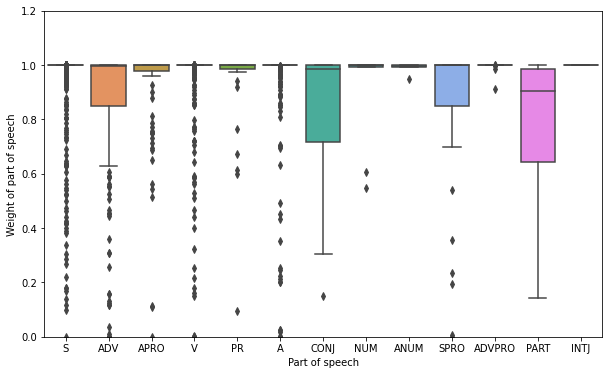

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="PoS", y="wt", data=df2)
plt.ylim((0, 1.2))
#plt.title('Variation in length during different Disney eras')
plt.ylabel('Weight of part of speech')
plt.xlabel('Part of speech');

Using plotly can aslo get the same boxplot.

In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [15]:
data = []
for PoS in df2.PoS.unique():
    data.append(
        go.Box(y=df2[df2["PoS"]==PoS].wt, name=PoS)
    )

iplot(data, show_link = False)

From the above three plots, we can know that the weight values of the NUM, ANUM, ADVPRO, and INTJ are more concentrate, which means they are not likely to change word form in this novel. But the S, V, and A have more discrete weight values, which means they are more likely to change word form in this novel.
We can group the values by part of speech, and list all the words of each part of speech.

In [146]:
packs.groupby(["PoS"], sort=False).agg({"content": set})

,content
PoS,
S,"{какогото, мгновение, дым, человек, катькой, о..."
ADV,"{позади, бессильно, устало, чуть, можно, попол..."
APRO,"{вся, своими, эта, другой, всякий, такая, свое..."
V,"{подключенной, отбило, взявшаяся, заготовить, ..."
PR,"{возле, со, во, обо, против, под, после, над, ..."
A,"{большая, хороший, полумертвым, нижних, ленски..."
CONJ,"{или, как, да, что, а, но, то, сколько, чтоб, ..."
NUM,"{меньше, семь, пяти, два, двух, сорок, тридцат..."
ANUM,"{первое, восьмом, первого, первых, первому, тр..."


We can count the lenth of the worrds and add the values to the dataframe as a new column.

In [5]:
def length(content):
    if type(content) == str:
        text = [len(content) for word in content]
    return len(content)

In [6]:
df2 = packs.copy()
df2["len"] = df2["content"].apply(length)
df2.head()

,count,content,lex,PoS,wt,len
0,1,имя,имя,S,1.000000,3
1,2,валентина,валентин,S,0.100394,9
2,1,григорьевича,григорьевич,S,1.000000,12
3,2,распутина,распутин,S,0.938272,9
4,1,известно,известно,ADV,0.036009,8


We can add the length of words into the previous plot "Which kind of part of speech of words are more?" to creat a new one.

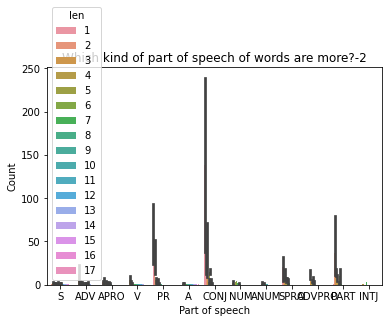

In [213]:
sns.barplot(x="PoS", y="count", hue='len', data=df2)
plt.title('Which kind of part of speech of words are more?-2')
plt.xlabel('Part of speech')
plt.ylabel('Count');

As we can see, the plot is so small to see all details. To get a more clear view of the high frequent words, we can filter out the words more than 10 in the novel to creat a bar plot.

In [214]:
df3 = df2[df2['count']>10]
df3.head()

,count,content,lex,PoS,wt,len
7,23,его,его,APRO,0.000033,3
10,107,на,на,PR,0.998952,2
15,239,и,и,CONJ,0.999977,1
39,127,в,в,PR,0.999992,1
57,39,но,но,CONJ,0.999891,2


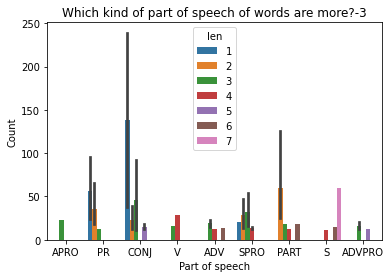

In [215]:
df3 = sns.barplot(x="PoS", y="count", hue='len', data=df3)
plt.title('Which kind of part of speech of words are more?-3')
plt.xlabel('Part of speech')
plt.ylabel('Count');

From this plot, we can know that the one character PR and CONJ and 2 characters PART are more than other words in this novel.
And we can also test the cross-correlation of lenth, count, and weight of words.

In [216]:
df4=df2[["len","count","wt"]]
df4.head()

,len,count,wt
0,3,1,1.000000
1,9,2,0.100394
2,12,1,1.000000
3,9,2,0.938272
4,8,1,0.036009


<AxesSubplot:>

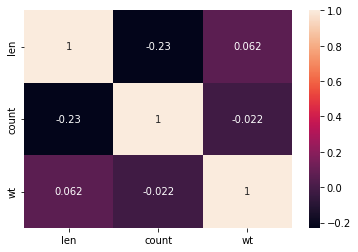

In [217]:
sns.heatmap(df4.corr(), annot=True)

From this plot we can know the length of words are more correlated with weight of words than with count of words in this novel.

In conclusion, in the novel «Живи и помни», the most often words are "и", "не", "в", "на", "что", the verbs, nouns, adjectives, and adverbs are more than other words, the one character PR and CONJ and 2 characters PART are more than other words, the weight values of the NUM, ANUM, ADVPRO, and INTJ are more concentrate, which means they are not likely to change word form in this novel. But the S, V, and A have more discrete weight values, which means they are more likely to change word form, the length of words are more correlated with weight of words than with count of words.